In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.__version__

'0.10.1'

In [3]:
# Imported datasets with Seaborn
sns.get_dataset_names()
['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [4]:
# Loading dataset
iris = sns.load_dataset("iris")

In [5]:
type(iris)

pandas.core.frame.DataFrame

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

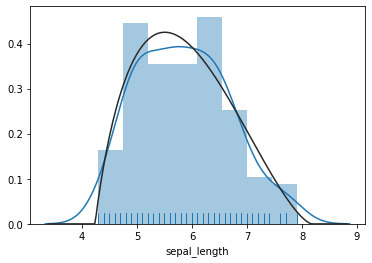

In [9]:
#displot
#a plot with a univariate distribution — one variable. We call the distplot function, we pass the name of the variable sepal_length, from the iris dataset, we indicate that we want to enable rug and adjust the data set according to the fit parameter:
sns.distplot(iris.sepal_length, rug = True, fit = stats.gausshyper);

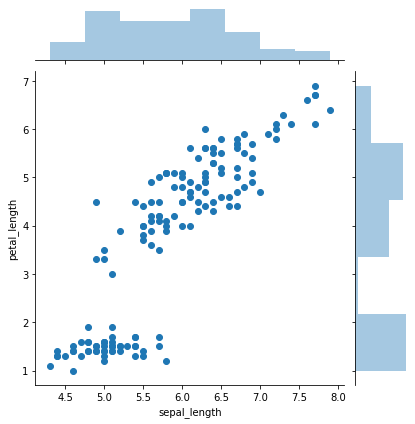

In [10]:
#Jointplot
#a plot for bivariate distribution, the famous scatterplot. See that we have the variables on each axis, the positively related data points, and the histograms with the frequency distribution for each variable.
# Scatterplot - Bivariate Distribution
sns.jointplot(x = "sepal_length", y = "petal_length", data = iris);


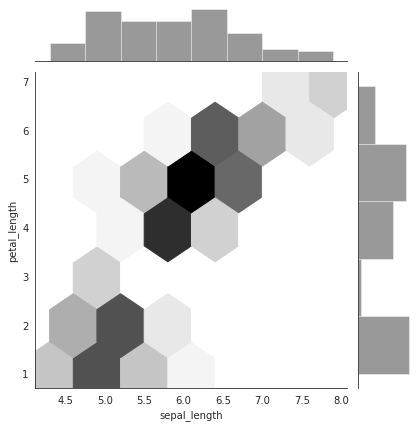

In [11]:
#Jointplot Hex
#We can also make some changes in this joint plot, consult the seaborn documentation and adjust the parameters in the desired way:
# Useful graph when working with large datasets
with sns.axes_style("white"):
     sns.jointplot(x = "sepal_length",
                   y = "petal_length",
                   data = iris,
                   kind = "hex",
                   color = "k");

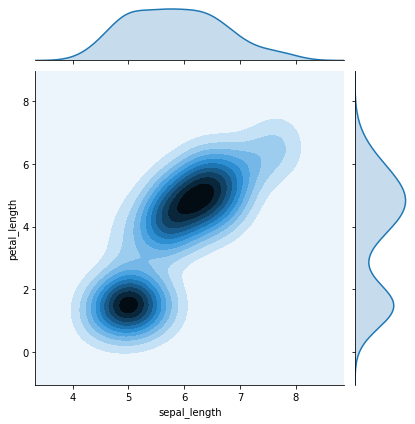

In [12]:
#Density Jointplot
#Instead of leaving the data points, we can change the kind parameter to KDE, note that the histograms of the axes have also been changed to density charts:
# Bivariate Distribution
sns.jointplot(x = "sepal_length",
              y = "petal_length",
              data = iris,
              kind = "kde");

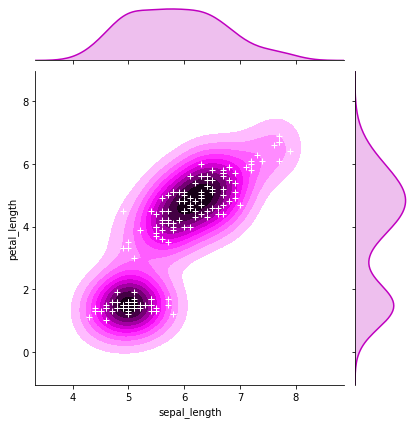

In [13]:
#Customizing Density Jointplot
#To exemplify what seaborn is capable of doing, here we have customization of the parameters of the previous density chart

# Bivariate Distribution
g = sns.jointplot(x = "sepal_length",
                  y = "petal_length",
                  data = iris,
                  kind = "kde",
                  color = "m")
g.plot_joint(plt.scatter, c = "w", s = 30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0);

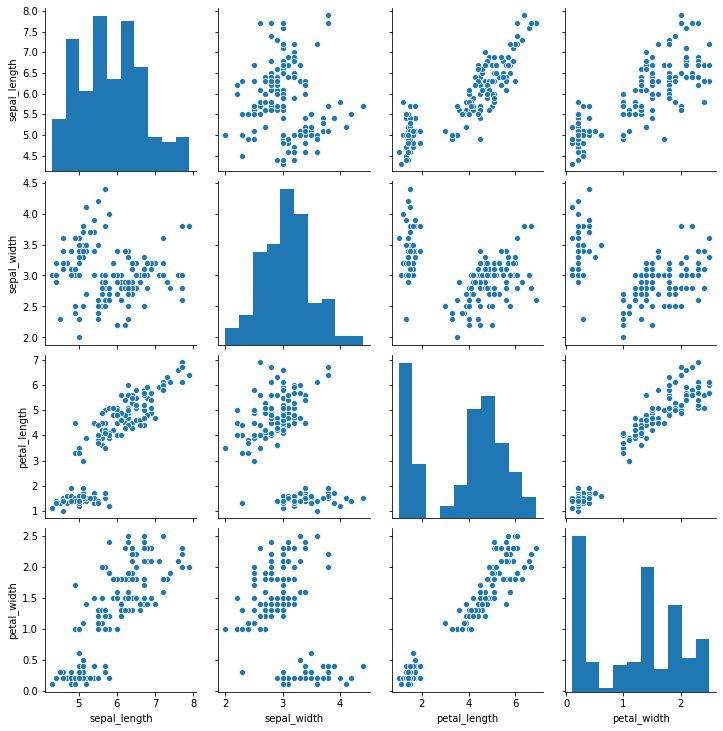

In [14]:
#Pairplot — Handy graph for few variables
#This graph shows the relationships between all variables in the dataset. Note that the only parameter in the pairplot function is the iris dataset.
#The function did by itself all combinations of all variables, placing scatterplots and histograms showing their relationships:


# Bivariate Distribution
sns.pairplot(iris);

In [15]:
# Loading tips dataset
tips = sns.load_dataset("tips")

In [16]:
type(tips)

pandas.core.frame.DataFrame

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


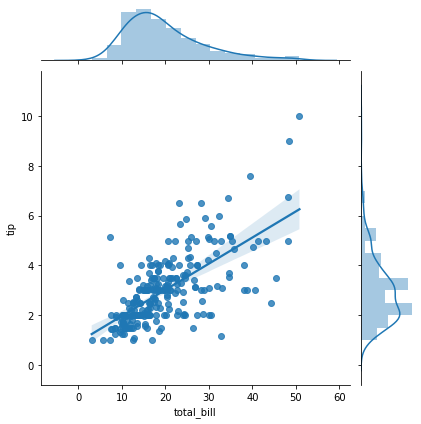

In [19]:
#Jointplot — Linear Regression
#We pass the variables x and y, passing the reg argument — linear regression to the kind parameter.
#This plot draws the scatterplot and creates the regression line — in practice, a Machine Learning algorithm delimits the margins of error, applied the histograms on the axes to verify the distribution of the variables, and still draws the line with the density graph — incredible.

# Scatterplot with regression line - Bivariate Distribution
sns.jointplot(x = "total_bill",
              y = "tip",
              data = tips,
              kind = "reg");

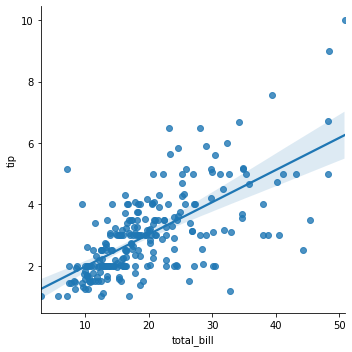

In [20]:
#Lmplot
#Instead of placing the joint plot with the histograms, we put only the scatterplot with the regression line:
# Linear Regression (uses 95% confidence interval by default

sns.lmplot(x = "total_bill",
           y = "tip",
           data = tips);

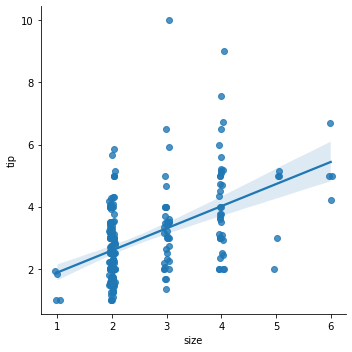

In [21]:
sns.lmplot(x = "size",
           y = "tip",
           data = tips,
           x_jitter = .05);

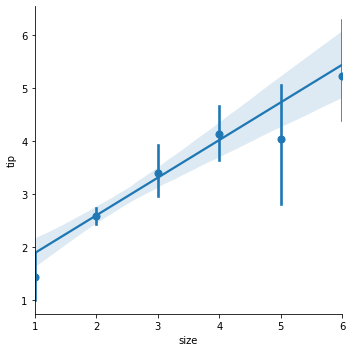

In [22]:
sns.lmplot(x = "size",
           y = "tip",
           data = tips,
           x_estimator = np.mean);

In [23]:
# Loading anscombe dataset
anscombe = sns.load_dataset("anscombe")

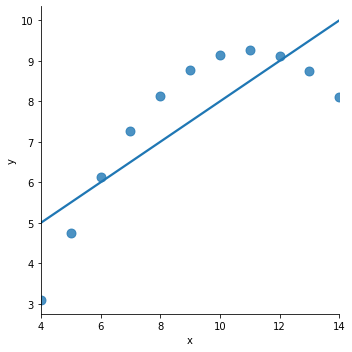

In [24]:
# Non-linear relationship
sns.lmplot(x = "x",
           y = "y",
           data = anscombe.query("dataset == 'II'"),
           ci = None,
           scatter_kws = {"s": 80});

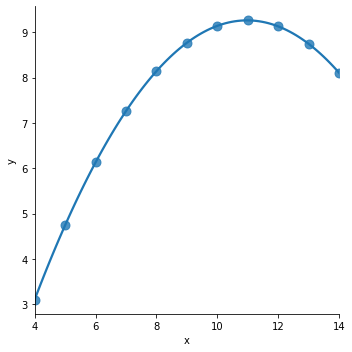

In [25]:
# We can adjust the parameters to fit the curve
sns.lmplot(x = "x",
           y = "y",
           data = anscombe.query("dataset == 'II'"),
           order = 2,
           ci = None,
           scatter_kws = {"s": 80});

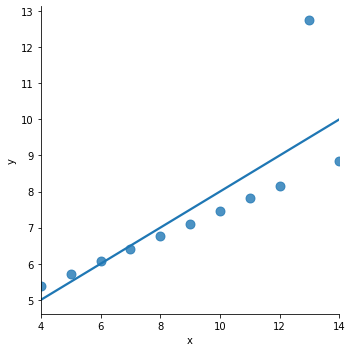

In [26]:
# Visualizing outliers
sns.lmplot(x = "x",
           y = "y",
           data = anscombe.query("dataset == 'III'"),
           ci = None,
           scatter_kws = {"s": 80});

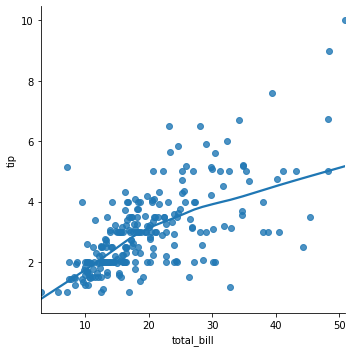

In [27]:
# Using lowess smoother for variable with non-linear relationships
sns.lmplot(x = "total_bill",
           y = "tip",
           data = tips,
           lowess = True);

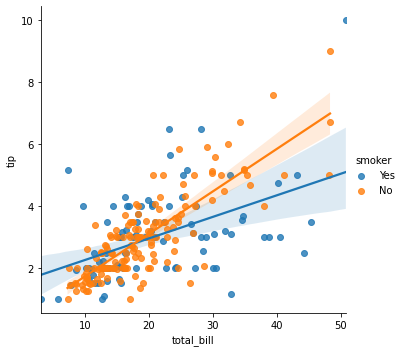

In [28]:
# Using more than 2 variables
sns.lmplot(x = "total_bill",
           y = "tip",
           hue = "smoker",
           data = tips);

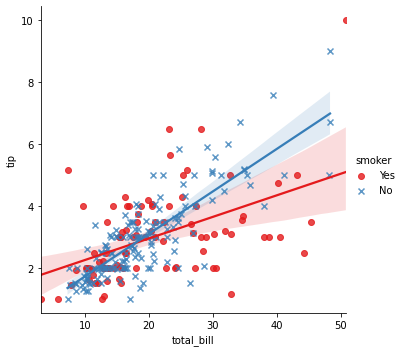

In [29]:
# Changing the chart setting
sns.lmplot(x = "total_bill",
           y = "tip",
           hue = "smoker",
           data = tips, markers = ["o", "x"],
           palette = "Set1");

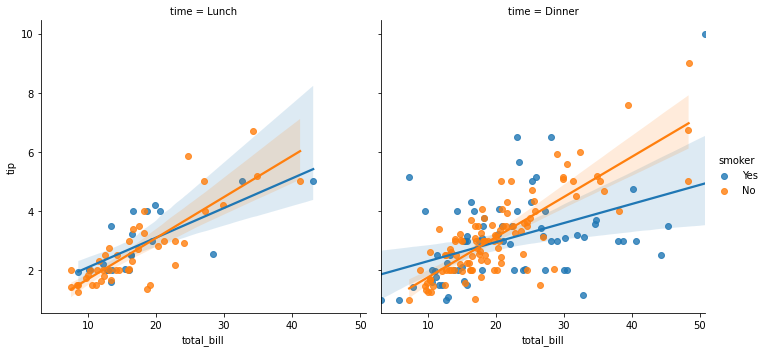

In [30]:
# Dividing the drawining area
sns.lmplot(x = "total_bill",
           y = "tip",
           hue = "smoker",
           col = "time",
           data = tips);

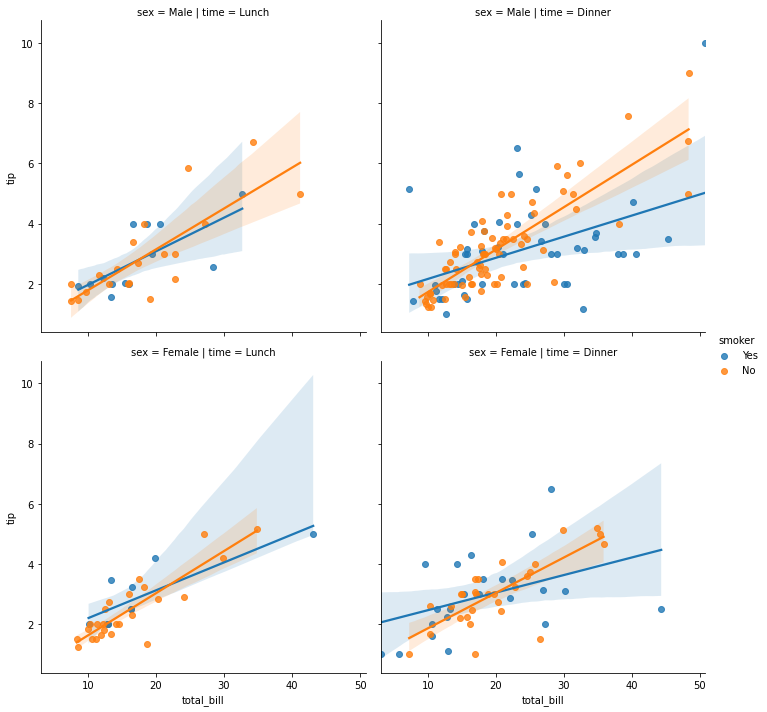

In [31]:
# Dividing the drawning area
sns.lmplot(x = "total_bill",
           y = "tip",
           hue = "smoker",
           col = "time",
           row = "sex",
           data = tips);

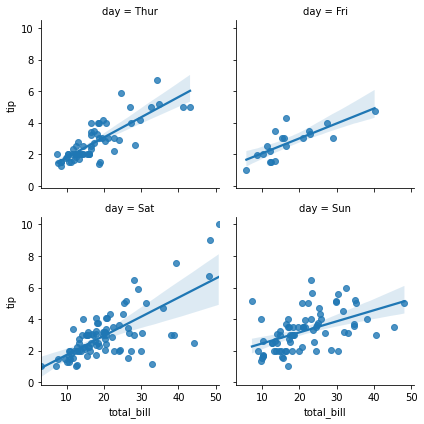

In [32]:
# Dividing the drawining area
sns.lmplot(x = "total_bill",
           y = "tip",
           col = "day",
           data = tips,
           col_wrap = 2,
           size = 3);

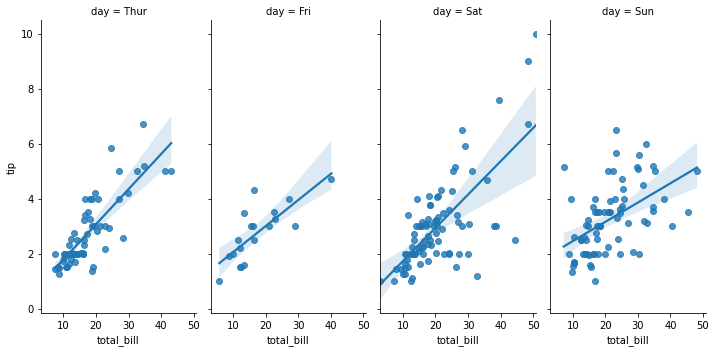

In [33]:
# Dividing the drawning area (horizontal area)
sns.lmplot(x = "total_bill",
           y = "tip",
           col = "day",
           data = tips,
           aspect = .5);

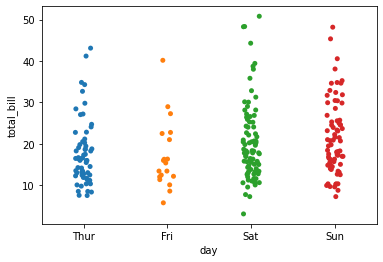

In [34]:
#working with categorial variables
# stripplot
sns.stripplot(x = "day",
              y = "total_bill",
              data = tips);

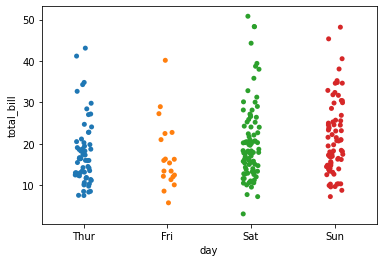

In [35]:
# stripplot
sns.stripplot(x = "day",
              y = "total_bill",
              data = tips,
              jitter = True);

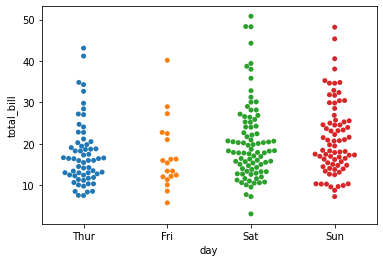

In [36]:
# swarmplot - Avoiding Categorical overlap points
sns.swarmplot(x = "day",
              y = "total_bill",
              data = tips);

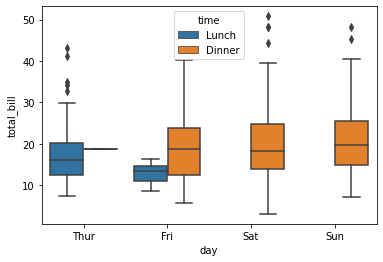

In [37]:
# boxplot
sns.boxplot(x = "day",
            y = "total_bill",
            hue = "time",
            data = tips);

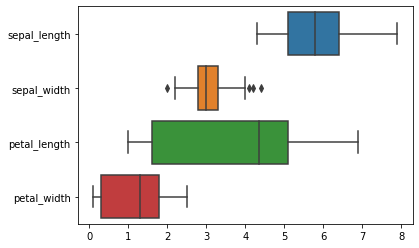

In [38]:
# boxplot
sns.boxplot(data = iris,
            orient = "h");

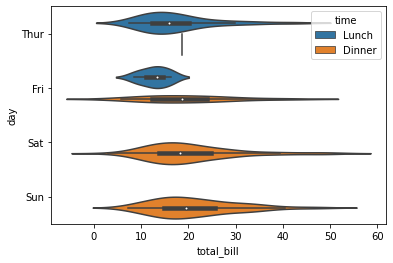

In [39]:
# violinplot
sns.violinplot(x = "total_bill",
               y = "day",
               hue = "time",
               data = tips);

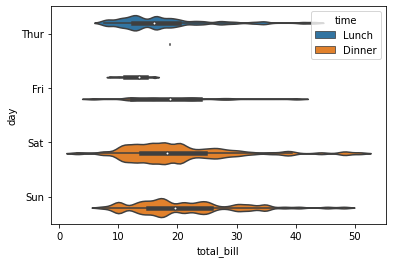

In [40]:
# violinplot (narrowing the plots)
sns.violinplot(x = "total_bill",
               y = "day",
               hue = "time",
               data = tips,
               bw = .1,
               scale = "count",
               scale_hue = False);

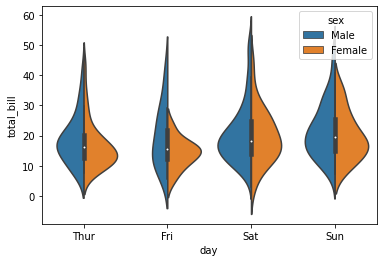

In [42]:
# violinplot (vertical orientation)
sns.violinplot(x = "day",
                y = "total_bill",
                hue = "sex",
                data = tips,
                split = True);

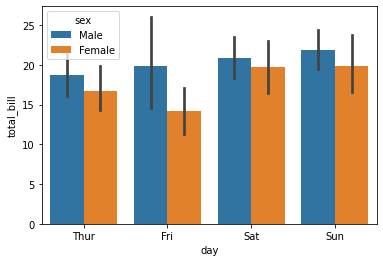

In [43]:
# barplot
sns.barplot(x = "day",
            y = "total_bill",
            hue = "sex",
            data = tips);

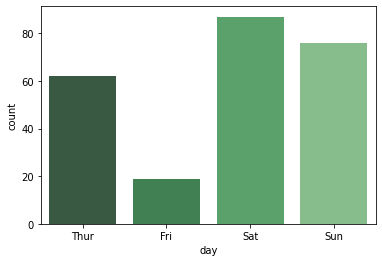

In [44]:
# countplot
sns.countplot(x = "day",
              data = tips,
              palette = "Greens_d");

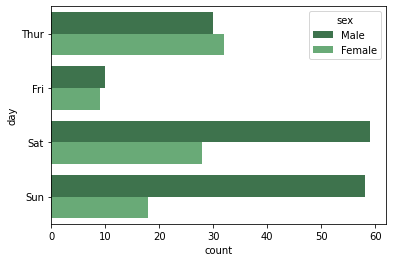

In [45]:
# countplot (horizontal)
sns.countplot(y = "day",
              hue = "sex",
              data = tips,
              palette = "Greens_d");

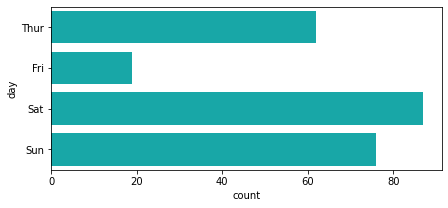

In [48]:
# countplot
f, ax = plt.subplots(figsize = (7, 3))
sns.countplot(y = "day",
                    data = tips,
                    color = "c");

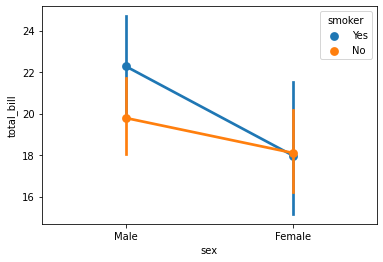

In [49]:
# pointplot
sns.pointplot(x = "sex",
              y = "total_bill",
              hue = "smoker",
              data = tips);

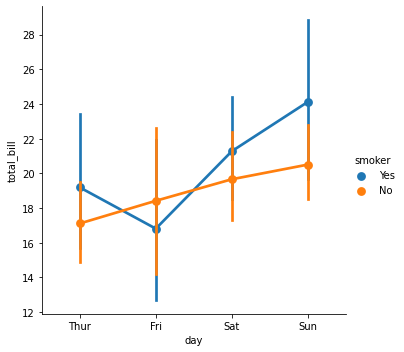

In [50]:
# factorplot
sns.factorplot(x = "day",
               y = "total_bill",
               hue = "smoker",
               data = tips);

In [52]:
#Viewing Pandas DataFrames in Seaborn
#Pandas DataFrames to generate statistical charts with Seaborn
#import libraries
import random
import pandas as pd

#create empty dataframe
df = pd.DataFrame()

#putting some random data in the df
df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)
df.head()

,x,y
0,14,69
1,23,15
2,38,41
3,42,33
4,17,23


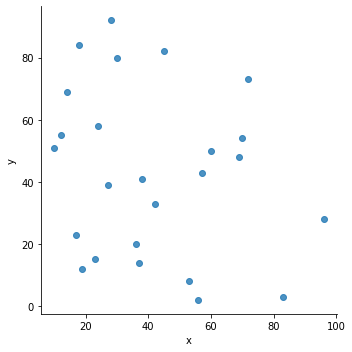

In [54]:
# Scatterplot
sns.lmplot('x',
           'y',
           data = df,
           fit_reg = False)

<AxesSubplot:>

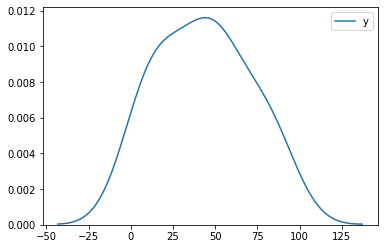

In [55]:
# Density Plot (A graph that shows the internal density area for the variable y)
sns.kdeplot(df.y)

<AxesSubplot:xlabel='x'>

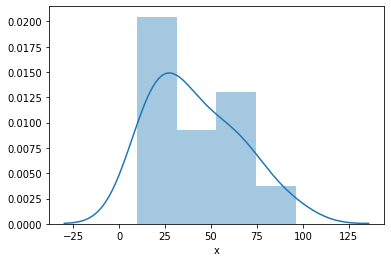

In [56]:
# Distplot (density of x with the distplot)
sns.distplot(df.x)

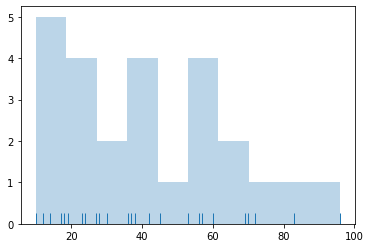

In [57]:
# Histogram (histogram with the rugs. Rugs are the points that appear at the base of the chart)
plt.hist(df.x, alpha = .3)
sns.rugplot(df.x);

<AxesSubplot:>

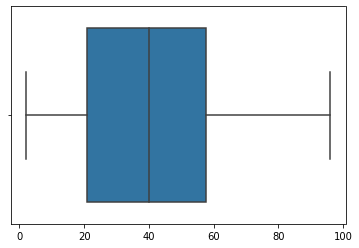

In [58]:
# Boxplot (Boxplot always valuable for quickly visualize the median, quartiles, and eventual outliers values)
sns.boxplot([df.y, df.x])

<AxesSubplot:>

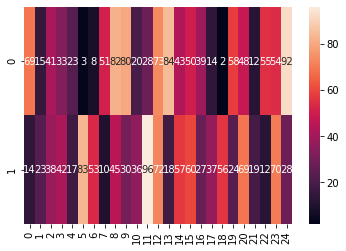

In [59]:
# Heatmap (heat map, showing the frequency of the data according to the most intense colouration)
sns.heatmap([df.y, df.x], annot = True, fmt = "d")

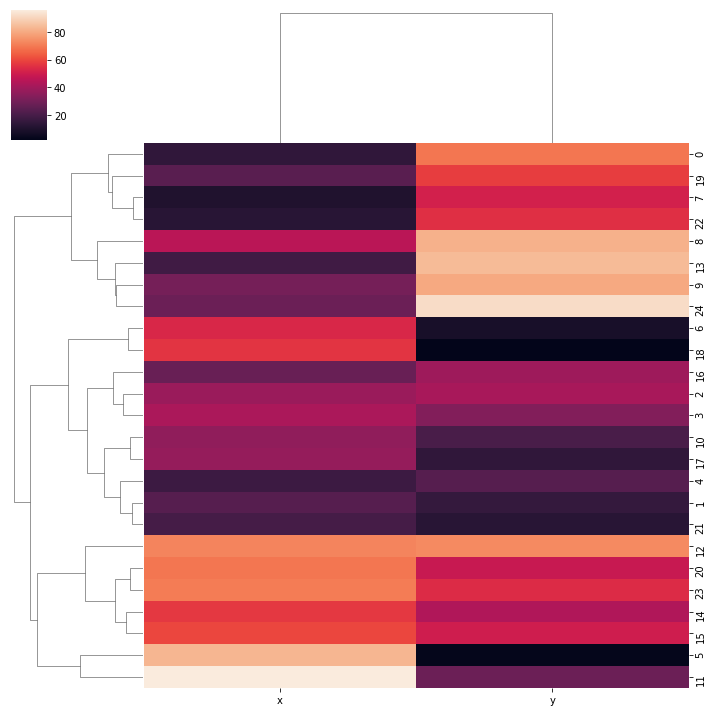

In [60]:
# Clustermap (division between clusters, widely used when working with unsupervised learning)
sns.clustermap(df)